In [1]:
# !pip install wordcloud
# !pip install tensorflow

In [1]:
import io
import os
from datetime import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder
from wordcloud import WordCloud
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [2]:
import pandas as pd

# Load the training and test datasets
train_df = pd.read_parquet(r'C:\Users\aarek\OneDrive\문서\DCU\ETSY\data\data\2024\train')
test_df = pd.read_parquet(r'C:\Users\aarek\OneDrive\문서\DCU\ETSY\data\data\2024\test')

# Display the first few rows of the training dataset to understand its structure
train_df.head()


,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text,image/encoded,image/width,image/height
0,699437355,Children&#39;s circle skirt BLUE GALAXY made o...,The fuxandfriends children&#39;s full circle s...,,physical,,,,,,...,clothing.girls_clothing.skirts,5,clothing,2,blue,2,blue,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,426
1,1323699538,"Cow Birthday Tutu for kids, Farm Theme Bday Ou...",💄This listing is for the TUTU ONLY (double rib...,"birthday outfit,girls birthday shirt,Tutu outf...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,11,pink,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,475
2,1142910558,"Zebra print tutu, animal print Skirt, World bo...",All tutus are handmade to order with two layer...,"black and white tutu,striped skirt,zebra tutu,...",physical,,,,,,...,clothing.girls_clothing.skirts,5,clothing,17,white,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,396
3,1320296928,"Lilac Tutu Rainbow Dots // Girl&#39;s Tutu, Tu...",Step aside because the princess pop star is he...,"tutu,girls skirt,sparkling tutu,fun skirt,ball...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,12,purple,13,rainbow,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
4,854901795,Bumblebee tutu yellow and black tutu halloween...,"Sparkle, shimmer, twirl and spin,\nThis tutu&#...","dog tutu,fluffy tutu,dance tutu,skirt,flower g...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,18,yellow,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570


In [3]:
train_df.shape

(229624, 26)

In [4]:
print(train_df.shape)
print(test_df.shape)
print(train_df.columns)
print(test_df.columns)

(229624, 26)
(25514, 18)
Index(['product_id', 'title', 'description', 'tags', 'type', 'room',
       'craft_type', 'recipient', 'material', 'occasion', 'holiday',
       'art_subject', 'style', 'shape', 'pattern', 'bottom_category_id',
       'bottom_category_text', 'top_category_id', 'top_category_text',
       'primary_color_id', 'primary_color_text', 'secondary_color_id',
       'secondary_color_text', 'image/encoded', 'image/width', 'image/height'],
      dtype='object')
Index(['product_id', 'title', 'description', 'tags', 'type', 'room',
       'craft_type', 'recipient', 'material', 'occasion', 'holiday',
       'art_subject', 'style', 'shape', 'pattern', 'image/encoded',
       'image/width', 'image/height'],
      dtype='object')


In [5]:
train_df.columns

Index(['product_id', 'title', 'description', 'tags', 'type', 'room',
       'craft_type', 'recipient', 'material', 'occasion', 'holiday',
       'art_subject', 'style', 'shape', 'pattern', 'bottom_category_id',
       'bottom_category_text', 'top_category_id', 'top_category_text',
       'primary_color_id', 'primary_color_text', 'secondary_color_id',
       'secondary_color_text', 'image/encoded', 'image/width', 'image/height'],
      dtype='object')

In [6]:
test_df.columns

Index(['product_id', 'title', 'description', 'tags', 'type', 'room',
       'craft_type', 'recipient', 'material', 'occasion', 'holiday',
       'art_subject', 'style', 'shape', 'pattern', 'image/encoded',
       'image/width', 'image/height'],
      dtype='object')

In [7]:
# Check for null values in the training data
print(train_df.isnull().sum())

# Check for null values in the test data
print(test_df.isnull().sum())


product_id              0
title                   0
description             0
tags                    0
type                    0
room                    0
craft_type              0
recipient               0
material                0
occasion                0
holiday                 0
art_subject             0
style                   0
shape                   0
pattern                 0
bottom_category_id      0
bottom_category_text    0
top_category_id         0
top_category_text       0
primary_color_id        0
primary_color_text      0
secondary_color_id      0
secondary_color_text    0
image/encoded           0
image/width             0
image/height            0
dtype: int64
product_id       0
title            0
description      0
tags             0
type             0
room             0
craft_type       0
recipient        0
material         0
occasion         0
holiday          0
art_subject      0
style            0
shape            0
pattern          0
image/encoded    0
image/w

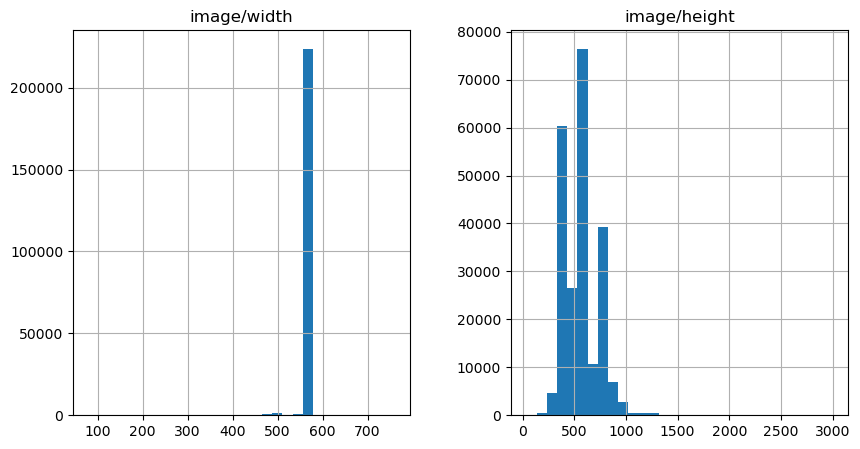

In [8]:
train_df[['image/width', 'image/height']].hist(bins=30, figsize=(10, 5))
plt.show()


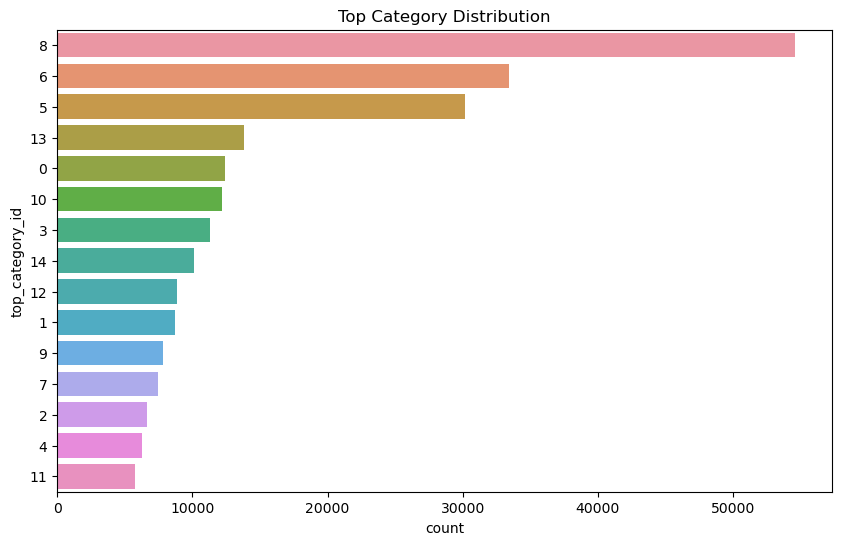

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(y='top_category_id', data=train_df, order = train_df['top_category_id'].value_counts().index)
plt.title('Top Category Distribution')
plt.show()


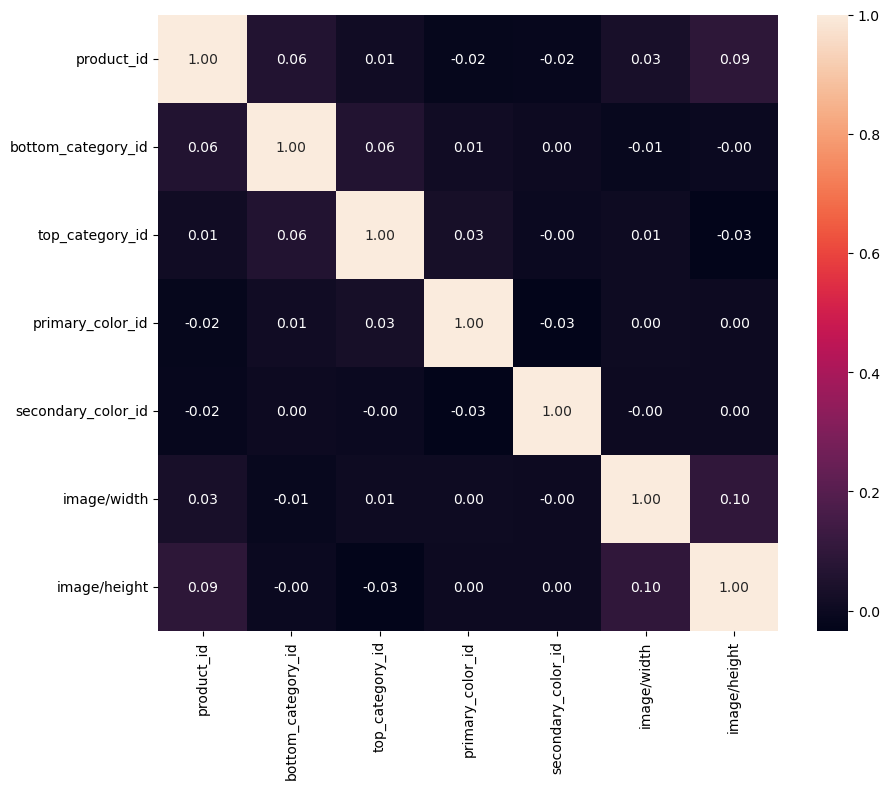

In [10]:
# Plot a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.select_dtypes(['number']).corr(), annot=True, fmt=".2f")
plt.show()


In [11]:
# !pip install wordcloud

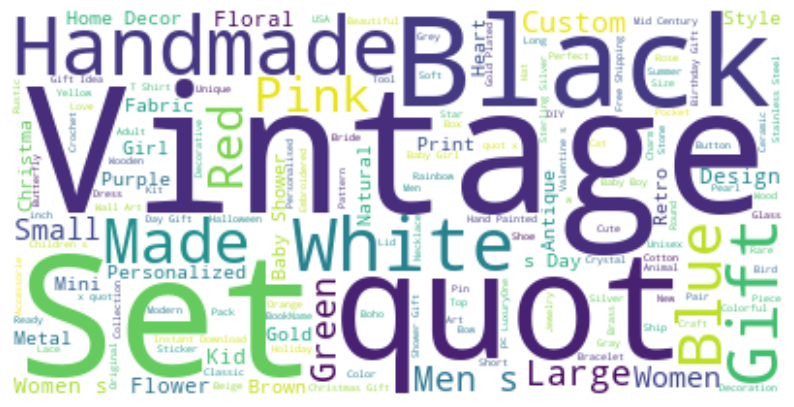

In [12]:
# from wordcloud import WordCloud

# Combine all titles into one large text and generate a word cloud
text = ' '.join(title for title in train_df['title'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Data Preprocessing

In [77]:
# Handling Unseen Categories
# To handle unseen categories, I am modifying the encoding process to ignore or handle tags that...
# weren't seen during the training phase. Here’s an adapted approach using a custom function that... 
# adds an 'unknown' category for unseen labels.

import numpy as np

def fit_transform_with_unknowns(train_series, test_series):
    """Fits a label encoder to the train data and transforms both train and test data, handling unseen labels by assigning them a common unknown label."""
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    # Fit on the train data
    le.fit(train_series)
    # Transform train data
    train_encoded = le.transform(train_series)
    
    # Create a mapping for the test data, setting unseen tags to a common unknown value
    test_encoded = np.array([le.classes_.tolist().index(x) if x in le.classes_ else -1 for x in test_series])
    
    return train_encoded, test_encoded, le

# Encode 'tags' with handling for unseen data
train_df['tags_encoded'], test_df['tags_encoded'], tags_le = fit_transform_with_unknowns(train_df['tags'].astype(str), test_df['tags'].astype(str))

# Now, you can apply similar methods to other categorical columns as needed


In [81]:
# Define target columns
target_cols = ['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']

# Continue with your model setup and other operations
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define input shape based on your preprocessed data dimensions
input_shape = train_df.drop(columns=target_cols).shape[1]  # Make sure this reflects your actual input features after preprocessing

# Define the input layer
inputs = Input(shape=(input_shape,))

# A common network layer
x = Dense(128, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

# Output layers for each target attribute
top_category_output = Dense(train_df['top_category_id'].nunique(), activation='softmax', name='top_category_output')(x)
bottom_category_output = Dense(train_df['bottom_category_id'].nunique(), activation='softmax', name='bottom_category_output')(x)
primary_color_output = Dense(train_df['primary_color_id'].nunique(), activation='softmax', name='primary_color_output')(x)
secondary_color_output = Dense(train_df['secondary_color_id'].nunique(), activation='softmax', name='secondary_color_output')(x)

# Build the model
model = Model(inputs=inputs, outputs=[top_category_output, bottom_category_output, primary_color_output, secondary_color_output])
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary to check the architecture
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 23)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 128)               │           3,072 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 128)               │               0 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 64)                │           8,256 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ top_category_output (Dense)   │ (None, 15)                │             975 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bottom_category_output        │ (None, 2609)              │         169,585 │ dense_5[0][0]              │
│ (Dense)                       │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ primary_color_output (Dense)  │ (None, 19)                │           1,235 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ secondary_color_output        │ (None, 19)                │           1,235 │ dense_5[0][0]              │
│ (Dense)                       │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 184,358 (720.15 KB)

 Trainable params: 184,358 (720.15 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'title' is the field to preprocess
text_data = train_df['title'].append(test_df['title'], ignore_index=True)  # Combine to ensure tokenizer fits on all possible words

# Tokenize text
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words based on vocabulary size needs
tokenizer.fit_on_texts(text_data)

# Convert text to sequences
train_text_seq = tokenizer.texts_to_sequences(train_df['title'])
test_text_seq = tokenizer.texts_to_sequences(test_df['title'])

# Pad sequences to ensure uniform input size
max_length = max(max(len(seq) for seq in train_text_seq), max(len(seq) for seq in test_text_seq))
train_text_padded = pad_sequences(train_text_seq, maxlen=max_length)
test_text_padded = pad_sequences(test_text_seq, maxlen=max_length)


C:\Users\aarek\AppData\Local\Temp\ipykernel_5324\16559620.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  text_data = train_df['title'].append(test_df['title'], ignore_index=True)  # Combine to ensure tokenizer fits on all possible words


In [91]:
import tensorflow as tf

def preprocess_image(encoded_images, target_size=(224, 224), batch_size=100):
    """Decode and preprocess image data in batches."""
    images = []
    for i in range(0, len(encoded_images), batch_size):
        batch_images = encoded_images[i:i+batch_size]
        batch_processed = []
        for img_str in batch_images:
            img = tf.image.decode_jpeg(img_str, channels=3)
            img = tf.image.resize(img, target_size)
            img = img / 255.0
            batch_processed.append(img)
        images.extend(batch_processed)  # Append processed batch to the main list
    return tf.stack(images)  # Creates a batch from the list of images

# Preprocess images in batches
train_images = preprocess_image(train_df['image/encoded'], batch_size=50)  # Adjust batch_size based on your memory capacity
test_images = preprocess_image(test_df['image/encoded'], batch_size=50)


ResourceExhaustedError: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[570,570,3] and type uint8 on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:DecodeJpeg]

In [87]:
# Prepare train features by dropping non-existing or target columns from train_df
train_features = train_df[numeric_cols].to_numpy()

# Prepare test features directly since target_cols are absent in test_df
test_features = test_df[numeric_cols].to_numpy()


In [88]:
# Prepare targets for training, ensuring all are categorical
train_targets = [to_categorical(train_df[col]) for col in target_cols if col in train_df.columns]

# Fit the model
history = model.fit(
    train_features,
    train_targets,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10


ValueError: Input 0 of layer "functional_7" is incompatible with the layer: expected shape=(None, 23), found shape=(None, 15)

In [ ]:
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)
for i, target in enumerate(train_targets):
    print(f"Shape of target {target_cols[i]}: {target.shape}")
